## 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

### Using Naive method:
A naive method would require you to the multiply rows of the first matrix with the columns of the second matrix. Each of these multiplying rows and columns would contain $k$ elements so for finding an element of the output matrix would need $k$ multiplications. Similarly we will have to add these obtained $k$ products. we will require $k-1$ additions to sum them up.

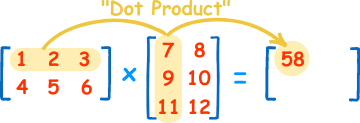

Since the output matrix will have $n * m$ elements we would require $n * m * k$ multiplications and $ n*m*(k-1)$ additions to perfrom complete matrix multiplication of two arrays.

Strassen method is also one of the methods that can be used for matrix multiplication and it takes lesser number of multiplication but more number of addition operations. Although faster, Strassen method is only applicable for square matrices

## 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


In [33]:
import numpy as np
import time 

N,K,M = map(int,input("Please enter the value of n ,k and m : ").split() )

#Taking first input matrix
print("Please enter n*k Matrix : ")
M1 =[]
for i in range(N):
    M1.append(list(map(int,input().split())))
#converting list of lists to an numpy array
A1 = np.array(M1)

#Taking second input matrix
print("Please enter k*m Matrix : ")
M2=[]
for i in range(K):
    M2.append(list(map(int,input().split())))
#converting list of lists to an numpy array
A2 = np.array(M2)


#Multiplying the List of list Matrix
#Output=[[0]*m]*n

tic = time.perf_counter()
for trial in range(500):
    Output=[[0]*M for i in range(N)]
    for i in range(N):
        for j in range(M):
            for z in range(K):
                Output[i][j] = Output[i][j] + M1[i][z] * M2[z][j]


toc = time.perf_counter()

print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Time taken by lists",(toc - tic)/500)

tic = time.perf_counter()
for trial in range(500):
    ArrayOutput = np.matmul(A1,A2) 
toc = time.perf_counter()


print("Time taken by Numpy Arrays",(toc - tic)/500)


Please enter the value of n ,k and m : 2 3 4
Please enter n*k Matrix : 
1 2 3
2 3 4
Please enter k*m Matrix : 
1 2 3 4
2 3 4 5
3 4 5 6
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Time taken by lists 2.1265043999846966e-05
Time taken by Numpy Arrays 1.6362660007871454e-06


As evident from the time stated above, Numpy arrays works faster than using inbuilt python list. This happens because of various reasons, few of which are listed below.
1. Numpy arrays are stored in contiguous memory and usually contain only one data type as oppsed to python list which is a collection of pointers to objects.
2. Data types in python themselves are objects which have their own overheads (storage and computational).
3. Since data in numpy are contigous operations can be performed parallely making numpy implimentation much faster.

## 3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using Above stated method, we will require n/2 passes of the array to compute median of the array. At every pass we will reduce of the size of the array by one.

Time Complexity of the above method would be $ n +  n-1 +  n-2 +..... + \frac{n}{2}$

Solving above sequence we will get a time complexity of $n^{2}$

A better method to solve this problem will be to *Sorting the array* and pick the element at $n/2 ^{th}$ index. This would require a time complexity of $n(logn)$. Another method could be to solve using *Median of Median* method. This method requires a time complexity of $n$ . Median of median would be the most optimum method to solve this problem.


In [2]:
def basicmethod(arr):
    n = int(len(arr))
    if n == 0 :
        print("No median available to be found")
    else:
        passes = (n//2 + 1) if n%2 == 0 else n//2 
        for i in range (passes):
            max = np.NINF
            index = 0
            for j in range(n-i):
                if arr[j] > max:
                    max = arr[j]
                    index = j
            arr[index],arr[n-i-1] = arr[n-i-1],arr[index]
        median = (arr[n//2 -1] + arr[n//2])/2 if n%2 == 0 else arr[n//2]
        print("median of the given array is : ", median)

def sortingmethod(arr):
    arr=np.sort(arr)
    n = len(arr)
    if n%2 == 0:
        median = (arr[n//2] + arr[n//2 - 1])/2
    else :
        median = arr[n//2]
    print("median of the given array is : ", median)
        
def numpymethod(arr):
    median = np.median(arr)
    print("median of the given array is : ", median)

nparr = np.array([4,3,1,2,2,3])

print(nparr)
basicmethod(nparr)
sortingmethod(nparr)
numpymethod(nparr)

[4 3 1 2 2 3]
median of the given array is :  2.5
median of the given array is :  2.5
median of the given array is :  2.5


## 4. What is the gradient of the following function with respect to x and y?
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $x^{2}y + y^{3} sin(x)$


Gradient with respect to x will be given as 

taking derivative with respect to x =>&emsp; $  2xy + y^{3}cos(x)$

taking derivative with respect to y =>&emsp; $ x^{2} + 3y^{2}sin(x)$

## 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [31]:
import jax
import jax.numpy as jnp
import math

#Original function
def func(x,y):
    # x^2*y + y^3*sin(x)
    return (((x**2) * y) + ((y**3) * jnp.sin(x)))

# Gradient of function 
def gradfunc(x,y):
    gradx = 2*x*y + (y**3)* math.cos(x)
    grady = x**2 + (3*(y**2)* math.sin(x))
    return (gradx, grady)

#Gradient obtained through JAX Library
g_func = jax.grad(func,(0,1))

#Analytically comparing both the gradient functions 
inp = jnp.array([[0.2, 0.3], [2.4, 3.6], [4.4, 2.1]])
for x in inp:
    a,b = x
    print("Explicit Gradient Function: {0} " .format(gradfunc(a,b)))
    print("JAX Gradient Function: {0}" .format(g_func(a,b)))
    print("")


Explicit Gradient Function: (DeviceArray(0.1464618, dtype=float32), DeviceArray(0.09364072, dtype=float32)) 
JAX Gradient Function: (DeviceArray(0.1464618, dtype=float32), DeviceArray(0.09364072, dtype=float32))

Explicit Gradient Function: (DeviceArray(-17.123838, dtype=float32), DeviceArray(32.022003, dtype=float32)) 
JAX Gradient Function: (DeviceArray(-17.123838, dtype=float32), DeviceArray(32.022003, dtype=float32))

Explicit Gradient Function: (DeviceArray(15.633791, dtype=float32), DeviceArray(6.7703066, dtype=float32)) 
JAX Gradient Function: (DeviceArray(15.633791, dtype=float32), DeviceArray(6.7703066, dtype=float32))



## 6.Use sympy to confirm that you obtain the same gradient analytically.

In [41]:
import jax
import jax.numpy as jnp
import sympy
from sympy import *

x, y, z = symbols('x y z')
#initializing input expression
input = (x**2)*y + y**3*sin(x)

print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
#Expanding the expression in the form of variables
exp = sympy.expand(input)
print("Expression before taking the gradient : {}".format(exp))
  
#Evaluating gradient with respect to x
grad_x = exp.diff(x)
#Evaluating gradient with respect to y
grad_y = exp.diff(y)
  
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Evaluating gradient with respect to x : {}".format(grad_x))
print("Evaluating gradient with respect to y : {}".format(grad_y))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

inp = jnp.array([[0.2, 0.3], [2.4, 3.6], [4.4, 2.1]])
print()
print("Gradient values obtained through Sympy are given below")
print(grad_x.evalf(subs={x:0.2,y:0.3}),grad_y.evalf(subs={x:0.2,y:0.3}))
print(grad_x.evalf(subs={x:2.4,y:3.6}),grad_y.evalf(subs={x:2.4,y:3.6}))
print(grad_x.evalf(subs={x:4.4,y:2.1}),grad_y.evalf(subs={x:4.4,y:2.1}))

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Expression before taking the gradient : x**2*y + y**3*sin(x)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Evaluating gradient with respect to x : 2*x*y + y**3*cos(x)
Evaluating gradient with respect to y : x**2 + 3*y**2*sin(x)
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Gradient values obtained through Sympy are given below
0.146461797601714 0.0936407193146665
-17.1238411922923 32.0220084598288
15.6337902911299 6.77030456244170


## 7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:



1. 2022
    
    1.Branch_1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2.Branch_2
    
    
2. 2023

    1.Branch_1
    
    2.Branch_2
    
    
3. 2024

    1.Branch_1
    
    2.Branch_2
    
    
4. 2025

    1.Branch_1
    
    2.Branch_2
    

In [ ]:
db_dict= {  '2022': {   'Branch_1': { '1': {    'Name' : 'Ayush',
                                                'Marks': {'Maths': 100, 'English': 89}
                                           } 
                                    },
                        'Branch_2': {'3':  {    'Name' : 'Ritika',
                                                'Marks': {'Maths': 35, 'English': 75}
                                           }
                                    } 
                    },
            '2023': {   'Branch_1':{ '1': {     'Name' : 'Appu',
                                                'Marks': {'Maths': 10, 'English': 90}} 
                                   }, 
                        'Branch_2':{ '1': {     'Name' : 'Atiko',
                                                'Marks': {'Maths': 60, 'English': 59}
                                          } 
                                   }
                    } 
         }

print(db_dict)

{'2022': {'Branch_1': {'1': {'Name': 'Ayush', 'Marks': {'Maths': 100, 'English': 89}}}, 'Branch_2': {'3': {'Name': 'Ritika', 'Marks': {'Maths': 35, 'English': 75}}}}, '2023': {'Branch_1': {'1': {'Name': 'Appu', 'Marks': {'Maths': 10, 'English': 90}}}, 'Branch_2': {'1': {'Name': 'Atiko', 'Marks': {'Maths': 60, 'English': 59}}}}}


## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
#Student class will contain the name, rollno and marks of the student.
class student:
    def __init__ (self,name,rollno,marks):
        self.name = name
        self.rollno = rollno
        self.marks = marks

#Branch class will contain its name and the list od students that are enrolled under that branch.
class branch:
    def __init__(self,name):
        self.name = name
        self.stulist = []
    
    def Add_student(self,stu):
        self.stulist.append(stu)   
        
#Year class will contain the year and the list of branches operating that year.
class Year:
    def __init__(self,name):
        self.name = name
        self.branchlist = []
    
    def Add_branches(self,brnch):
        self.branchlist.append(brnch)
        
# Database class will contain the entire database.it will have a name and list of years where course were offered.
class Database:
    def __init__(self,name):
        self.name = name
        self.yearlist = []
        
    def Add_year(self,yr):
        self.yearlist.append(yr)
        
# Creating Student Profile
s1 = student('Ayush','10',{'maths': 99, 'English': 90})
s2 = student('Appu','13',{'maths': 79, 'English': 55})
s3 = student('Ritika','16',{'maths': 56, 'English': 65})
s4 = student('Dobber','19',{'maths': 72, 'English': 45})

# Creating Branches
b1 = branch('CSE')
b2 = branch('ECE')

#Assigned Student 1 and 2 to first branch
b1.Add_student(s1)
b1.Add_student(s2)

#Assigned Student 3 and 4 to second branch
b2.Add_student(s3)
b2.Add_student(s4)

#Creating Year
yr1 = Year('2022')
yr2 = Year('2021')

#Assigned branch1 to year1
yr1.Add_branches(b1)
#Assigned branch2 to year2
yr2.Add_branches(b2)

db = Database('IITGN')
db.Add_year(yr1)
db.Add_year(yr2)

#Printing out the Database
print(db.name)
for i in db.yearlist:
    print(" "*4 ,i.name)
    for j in i.branchlist:
        print(" "*8 ,j.name)
        for k in j.stulist:
            print(" "*12 ,k.name,k.rollno, k . marks)

IITGN
     2022
         CSE
             Ayush 10 {'maths': 99, 'English': 90}
             Appu 13 {'maths': 79, 'English': 55}
     2021
         ECE
             Ritika 16 {'maths': 56, 'English': 65}
             Dobber 19 {'maths': 72, 'English': 45}


## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x$
2. $y = x^{2}$
3. $y = \frac{x^{3}}{100}$
4. $y = sin(x)$
5. $y = \frac{sin(x)}{x}$
6. $y = log(x)$
7. $y = e^{x}$

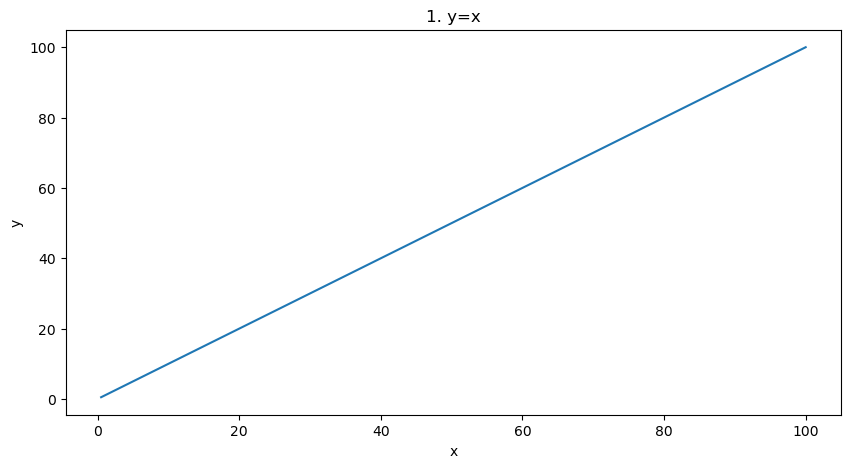

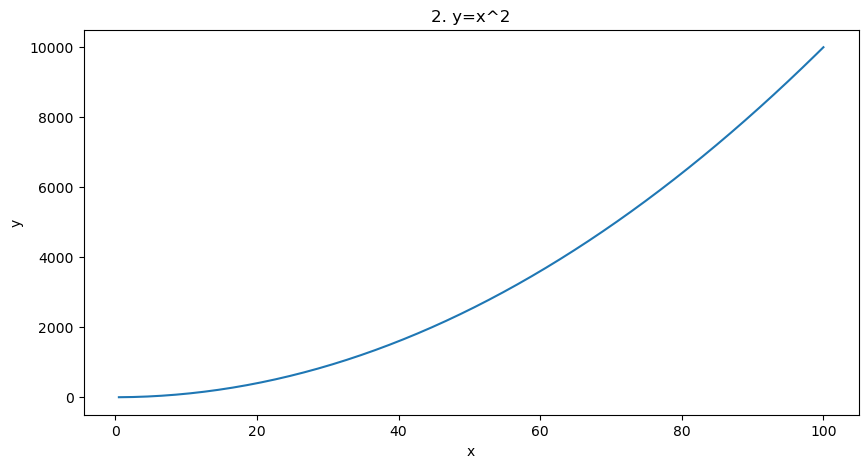

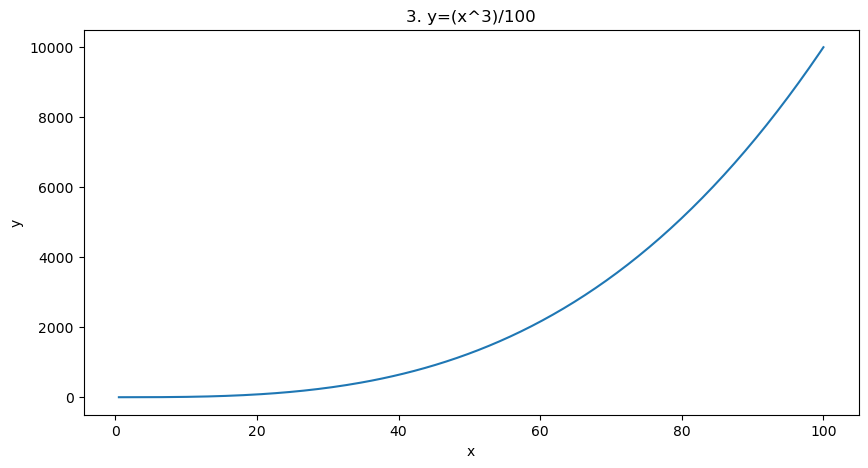

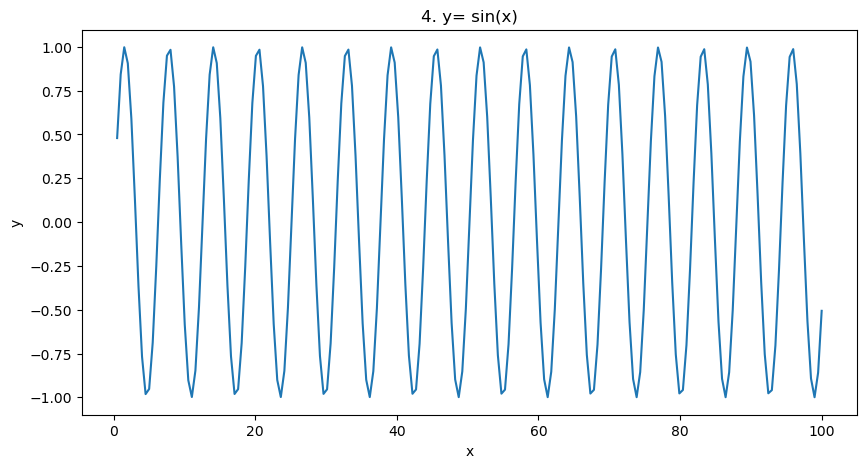

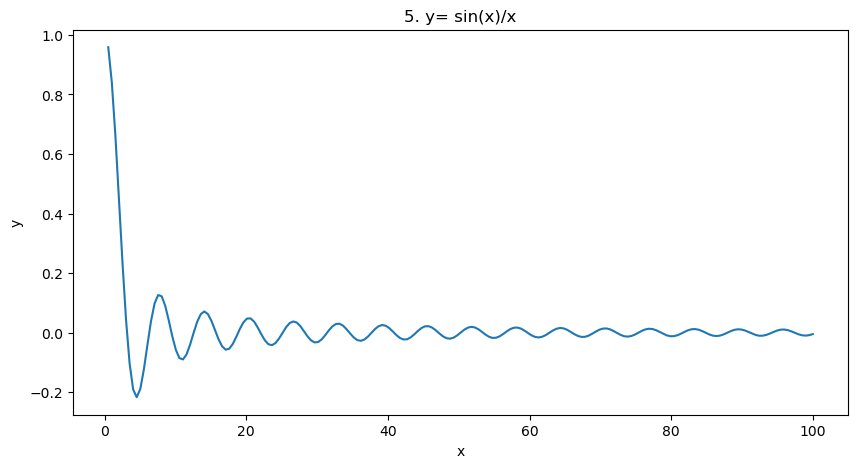

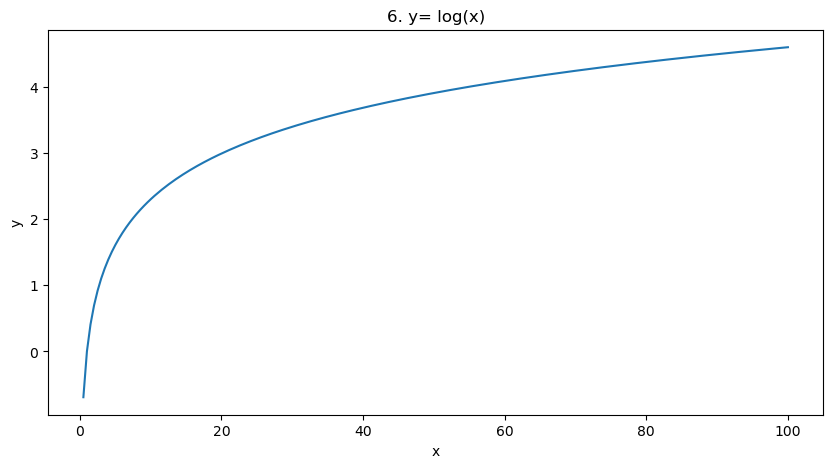

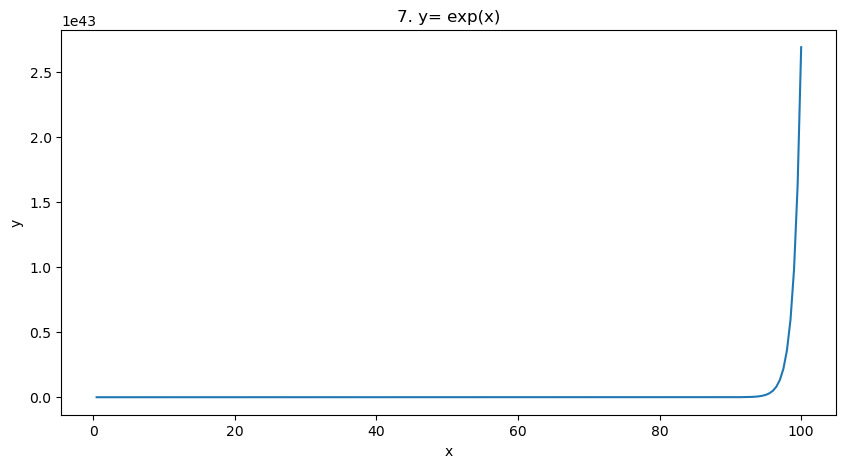

In [ ]:
import matplotlib.pyplot as mplt
import numpy as np
 
start = 0.5
stop = 100.0
steps = 0.5 
samples = (stop - start)//steps

x = np.linspace(start, stop, int(samples))

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Plotting graph 1
y = x 
fig = mplt.figure(figsize = (10, 5))
mplt.plot(x, y)
mplt.title("1. y=x")
mplt.xlabel("x")
mplt.ylabel("y")
mplt.show()

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Plotting graph 2
y = x**2
fig = mplt.figure(figsize = (10, 5))
mplt.plot(x, y)
mplt.title("2. y=x^2")
mplt.xlabel("x")
mplt.ylabel("y")
mplt.show()

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Plotting graph 3
y = (x**3)/100
fig = mplt.figure(figsize = (10, 5))
mplt.plot(x, y)
mplt.title("3. y=(x^3)/100")
mplt.xlabel("x")
mplt.ylabel("y")
mplt.show()

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Plotting graph 4
y = np.sin(x)
fig = mplt.figure(figsize = (10, 5))
mplt.plot(x, y)
mplt.title("4. y= sin(x)")
mplt.xlabel("x")
mplt.ylabel("y")
mplt.show()

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Plotting graph 5
y = np.sin(x) / x
fig = mplt.figure(figsize = (10, 5))
mplt.plot(x, y)
mplt.title("5. y= sin(x)/x")
mplt.xlabel("x")
mplt.ylabel("y")
mplt.show()

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Plotting graph 6
y = np.log(x)
fig = mplt.figure(figsize = (10, 5))
mplt.plot(x, y)
mplt.title("6. y= log(x)")
mplt.xlabel("x")
mplt.ylabel("y")
mplt.show()

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Plotting graph 17
y = np.e**x
fig = mplt.figure(figsize = (10, 5))
mplt.plot(x, y)
mplt.title("7. y= exp(x)")
mplt.xlabel("x")
mplt.ylabel("y")
mplt.show()

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


## 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import pandas as pd

# Numpy to generate 20x5 matrix containing random numbers drawn uniformly from the range 1 to 2.
data = np.random.uniform(1,2,(20,5))

# Creating a dataframe for this matrix
df = pd.DataFrame(data,columns = ['a','b','c','d','e'])
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print()
print(df)
print()
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

#Finding the column with the highest standard deviation and the  row with the lowest mean.

std_column_keys = list(df.std(axis=0).keys())
std_column_values = list(df.std(axis=0).values)  
columnindex = std_column_values.index(max(std_column_values)) 

mean_row_keys = list(df.mean(axis=1).keys())
mean_row_values = list(df.mean(axis=1).values)
rowindex = mean_row_values.index(min(mean_row_values))

#printing found values
print()
print("Colunm with highest standard deviation : ", std_column_keys[columnindex])
print("Column with lowest mean : ", mean_row_keys[rowindex] )


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

           a         b         c         d         e
0   1.469695  1.744738  1.121294  1.290181  1.438774
1   1.822472  1.161244  1.003000  1.603457  1.785485
2   1.051458  1.061323  1.458448  1.371275  1.699691
3   1.224513  1.856297  1.559757  1.595281  1.768997
4   1.718704  1.525023  1.825161  1.102492  1.597907
5   1.927657  1.629372  1.149348  1.819791  1.204574
6   1.387393  1.623916  1.534775  1.902569  1.311699
7   1.448909  1.030629  1.851679  1.251215  1.122076
8   1.450529  1.671734  1.168549  1.224456  1.746123
9   1.919154  1.956763  1.432445  1.686315  1.439574
10  1.189049  1.720375  1.392735  1.287655  1.985928
11  1.347289  1.199132  1.574200  1.101381  1.959172
12  1.815961  1.633776  1.171280  1.041727  1.572800
13  1.766807  1.812727  1.337296  1.974979  1.069271
14  1.771668  1.755120  1.956856  1.616632  1.126907
15  1.238364  1.484686  1.791869  1.718504  1.758363
16  1.045155  1.644939  1.572677  1.414429  

## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
#creating a new copy of dataframe 
df1 = pd.DataFrame(data,columns = ['a','b','c','d','e'])

#creating the column 'f' and inserting it into the dataframe.
f = df1['a'] + df1['b'] + df1['c'] + df1['d'] + df1['e']
df1.insert(5,'f',f)
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print()
print("Dataframe after adding column f")
print()
print(df1)
print()
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

#creating the column 'g' and inserting it into the dataframe.
g = np.array([])

for i in f:
    if i<8:
        g = np.append( g,['LT8'])
    else :
        g = np.append( g,['GT8'])
         
df1.insert(6,'g',g)

print()
print("Dataframe after adding column g")
print()
print(df1)
print()
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

#Counting number of rows in dataframe where column 'g' contains 'LT8' 
count=0
for i in df1['g']:
    if i == 'LT8':
        count = count + 1
print()
print("The number of rows in the dataframe where the value in the column “g” is “LT8” : ",count)
print()

#Calculating standard deviation of column 'f' when column 'g' contains 'LT8' and 'GT8' respectively.
LT8arr = np.array([])
GT8arr = np.array([])
for i,j in df1[['f','g']].values :
    if j == 'LT8' :
        LT8arr = np.append(LT8arr,i)
    else :
        GT8arr = np.append(GT8arr,i)

print("The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” : " , LT8arr.std())
print("The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” : " , GT8arr.std())
    




=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Dataframe after adding column f

           a         b         c         d         e         f
0   1.500834  1.937060  1.411772  1.909704  1.139099  7.898469
1   1.778037  1.568423  1.884477  1.730236  1.437841  8.399012
2   1.677216  1.098988  1.613373  1.060716  1.048114  6.498407
3   1.976496  1.297439  1.932468  1.039474  1.689400  7.935277
4   1.323692  1.678647  1.697874  1.346790  1.137521  7.184524
5   1.660799  1.927754  1.387980  1.009085  1.085818  7.071436
6   1.655894  1.935075  1.982992  1.974595  1.012737  8.561292
7   1.237855  1.046466  1.782715  1.955390  1.848673  7.871098
8   1.164772  1.072161  1.226676  1.312556  1.778639  6.554804
9   1.868606  1.098119  1.253883  1.579947  1.401153  7.201707
10  1.843855  1.020166  1.539864  1.651460  1.276745  7.332090
11  1.906885  1.685009  1.855969  1.111110  1.543885  8.102857
12  1.717141  1.484693  1.163660  1.096427  1.319196  6.781117
13  1.073651

## 12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting is how numpy deals with matrices of different shapes during arithmatic operations. numpy expands or stretches the smaller matrix to fit in the size of the larger one to perfrom the arithmatic operations. Simplest example of broadcasting is when we try to multiply a scalar and a numpy array. 

arr = np.array([1,2,3,4])

scalar = 3

output of $scalar$ x $arr$ would become an element-wise multiplication of arrays  $[3,3,3,3]$  and  $[1,2,3,4]$. 

Here the scalar value has been expanded to fit the size of the other numpy array

In [ ]:
arr = np.array([1,2,3,4])
scalar = 3
print(scalar*arr)

[ 3  6  9 12]


## 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
#Defining custom argmin function
def custom_argmin(arr):
    # numpy's argmin function first flattens the array into a 1-D array then finds the index of the given element
    flat = list(arr.flatten())
    return flat.index(min(flat))

arr = np.array([[[5,20,30],[20 , 10 ,5], [10,20 ,30]],[[5,20,30],[20 , 10 ,5], [10,20 ,3]]])

print("Min value calculated through custom argmin function : ",custom_argmin(arr))
print("Min value calculated through numpy's argmin function : ",np.argmin(arr))

Min value calculated through custom argmin function :  17
Min value calculated through numpy's argmin function :  17
